In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [5]:
def get_data(bank="A"):
    fnames = glob.glob(fdir+'Daisy/*/*_03_*'+bank+'*rfireduced.npz')
    fnames.sort()
    fdiode, pdiode = np.load('../calibrations/lownoise_calibration_3C295_03_'+bank+'yy.npy')
    calibrated = [] 
    ras = []
    decs = []
    meansub = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']

        gain = pdiode / ( nz['yyon'] - nz['yyoff'])
        ratio = nz['yyoff'] / nz['yyon']
        calibd = nz['yyoff'] * gain

        sigma = 1. / np.sqrt(1500.e6 / 512. * 0.04)
        noiseratio = ratio.std(0) / ratio.mean(0)
        bad = noiseratio > ( np.nanmedian(noiseratio) + sigma )
        mask[bad] = False
        gainmedian = np.nanmedian(np.nanmean(gain[:, mask], 1))
        gainstd = np.nanstd(np.nanmean(gain[:, mask], 1))
        tmask = np.abs(np.nanmean(gain[:, mask], 1) - gainmedian) < (4. * gainstd)

        calibd = calibd[tmask,:][:,mask]
        cleandata_tod = np.nanmean(calibd, 1)

        calibrated = np.concatenate([calibrated, cleandata_tod])
        meansub = np.concatenate([meansub, cleandata_tod - np.nanmedian(cleandata_tod)])
        ras = np.concatenate([ras, ra[tmask]])
        decs = np.concatenate([decs, dec[tmask]])
    return calibrated, meansub, ras, decs

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


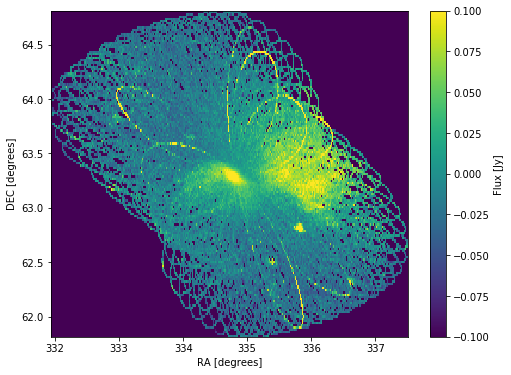

In [6]:
calibrated, meansub, ras, decs = get_data('A')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

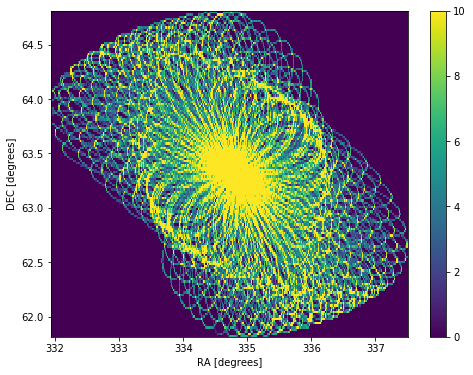

In [7]:
pc = pcolormesh(rabins, decbins, hits.T)
clim(0, 10)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [8]:
rc = 335.
dc = 63.38 

In [9]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
annulus = (radius > 80./60.) & (radius < 2.)

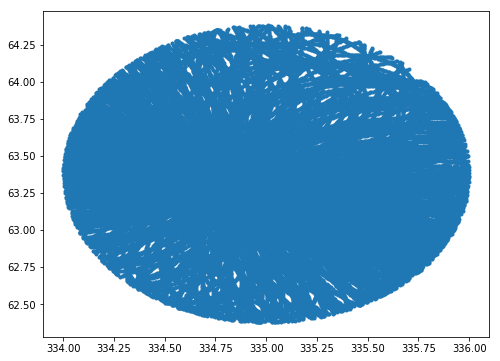

In [10]:
plot(ras[rmask], decs[rmask], '.')

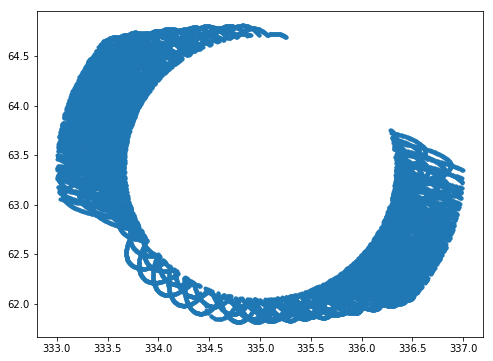

In [11]:
plot(ras[annulus], decs[annulus], '.')

In [26]:
calibrated, meansub, ras, decs = get_data('B')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [27]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
datamap, hits, rabins, decbins = naive_map(meansub[rmask], ras[rmask], decs[rmask], 120, 120)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


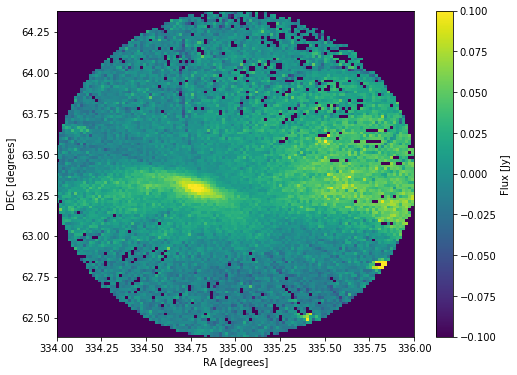

In [28]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [29]:
annulus = (radius > 80./60.) & (radius < 2.)
datamap, hits, rabins, decbins = naive_map(meansub[annulus], ras[annulus], decs[annulus], 240, 240)
mask = hits == 0
nullA = datamap / hits
nullA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


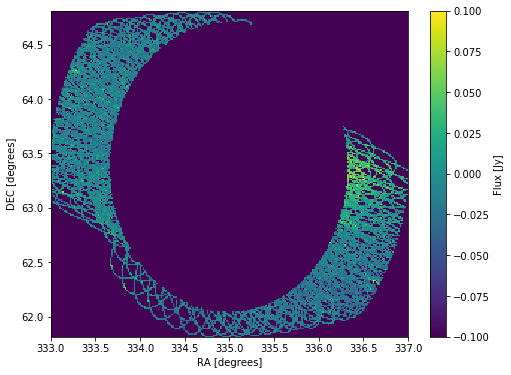

In [30]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, nullA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [ ]:
print np.nansum(signalA)

In [18]:
print np.nansum(signalA - np.nanmedian(nullA))

327.165703974


In [19]:
np.nanmedian(nullA)

-0.015150078108454146

In [20]:
beam1arcmin = ( (1./60.) * (np.pi / 180.) )**2

In [21]:
print beam1arcmin

8.46159499408e-08


In [22]:
12.6 / 4.575

2.7540983606557377

In [23]:
actualbeam = ( (2.75/60.) * (np.pi / 180.) )**2

In [24]:
print beam1arcmin / actualbeam

0.132231404959


In [25]:
print ( np.nansum(signalA - np.nanmedian(nullA)) ) * beam1arcmin / actualbeam

43.2615806907


In [81]:
40.1, 38.6, 39.8

(40.1, 38.6, 39.8)

In [ ]:
43.3